## Test notebook

In [9]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk 
import numpy as np
nltk.download('words')
nltk. download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
from joblib import dump, load

[nltk_data] Downloading package words to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/richameherwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Read Pre-Processed Data 
#### Change the file name here preprocessed_airbnb.csv/preprocessed_hotel.csv

In [10]:

df = pd.read_csv("preprocessed_hotel.csv", encoding = "ISO-8859-1")
df[:1]

,Unnamed: 0,S.No.,Review,Rating,bigrams,bigram_list,unigram_noun_list,rating_sentiment
0,0,1,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night,4,"[('nice', 'hotel'), ('hotel', 'expensive'), ('expensive', 'parking'), ('parking', 'got'), ('got', 'good'), ('good', 'deal'), ('deal', 'stay'), ('stay', 'hotel'), ('hotel', 'anniversary'), ('anniversary', 'arrived'), ('arrived', 'late'), ('late', 'evening'), ('evening', 'took'), ('took', 'advice'), ('advice', 'previous'), ('previous', 'reviews'), ('reviews', 'did'), ('did', 'valet'), ('valet', 'parking'), ('parking', 'check'), ('check', 'quick'), ('quick', 'easy'), ('easy', 'little'), ('little', 'disappointed'), ('disappointed', 'nonexistent'), ('nonexistent', 'view'), ('view', 'room'), ('room', 'room'), ('room', 'clean'), ('clean', 'nice'), ('nice', 'size'), ('size', 'bed'), ('bed', 'comfortable'), ('comfortable', 'woke'), ('woke', 'stiff'), ('stiff', 'neck'), ('neck', 'high'), ('high', 'pillows'), ('pillows', 'not'), ('not', 'soundproof'), ('soundproof', 'like'), ('like', 'heard'), ('heard', 'music'), ('music', 'room'), ('room', 'night'), ('night', 'morning'), ('morning', 'loud'), ('loud', 'bangs'), ('bangs', 'doors'), ('doors', 'opening'), ('opening', 'closing'), ('closing', 'hear'), ('hear', 'people'), ('people', 'talking'), ('talking', 'hallway'), ('hallway', 'maybe'), ('maybe', 'just'), ('just', 'noisy'), ('noisy', 'neighbors'), ('neighbors', 'aveda'), ('aveda', 'bath'), ('bath', 'products'), ('products', 'nice'), ('nice', 'did'), ('did', 'not'), ('not', 'goldfish'), ('goldfish', 'stay'), ('stay', 'nice'), ('nice', 'touch'), ('touch', 'taken'), ('taken', 'advantage'), ('advantage', 'staying'), ('staying', 'longer'), ('longer', 'location'), ('location', 'great'), ('great', 'walking'), ('walking', 'distance'), ('distance', 'shopping'), ('shopping', 'overall'), ('overall', 'nice'), ('nice', 'experience'), ('experience', 'having'), ('having', 'pay'), ('pay', 'parking'), ('parking', 'night')]",hotel_nice expensive_hotel expensive_parking deal_good hotel_stay advice_previous easy_quick disappointed_nonexistent nonexistent_view clean_nice nice_size bed_comfortable comfortable_woke neck_stiff goldfish_stay nice_touch great_location great_walking nice_overall experience_nice,hotel parking deal hotel advice valet check view room room size bed woke soundproof heard music room night morning closing hallway bath stay touch advantage location distance experience pay,pos


### 2. Define functions to extract top n keywords

In [11]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]  
    return results

#Reference- https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.X8ubn1Mza7M

### 3. Visualize Bi-grams using WordCloud

### a. Extract Keywords 

In [12]:
stopwords = set(STOPWORDS)  
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(df["bigram_list"].values.astype('U'))
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["bigram_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20) 

/Users/richameherwal/Desktop/Desktop-local/projects/CS_410/Final_Project/py3-env-final-proj/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### b. Use WordCloud to Visualize 

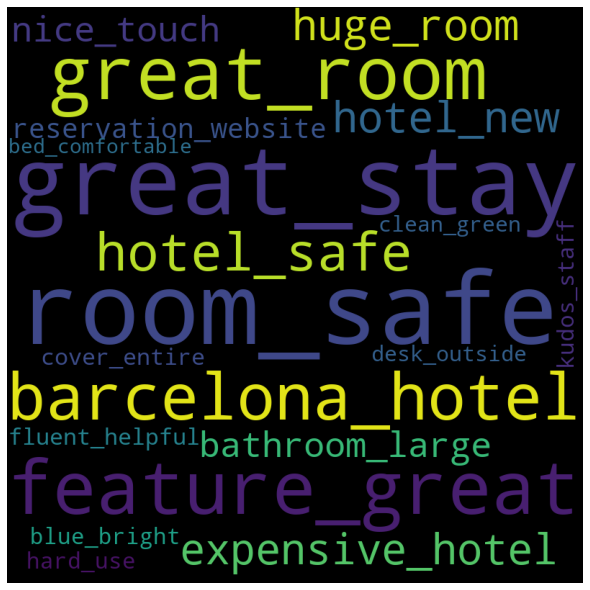

In [13]:
comment_words=""
for k in keywords:
    comment_words+=" "+str(k)
stopwords = set(STOPWORDS)        
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('hotel_review_wordcloud.png')
plt.show() 

### 4. Sentiment Analysis on Unigrams (NN) 

### a. Extract Keywords 

In [14]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(df["unigram_noun_list"].values.astype('U'))

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["unigram_noun_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
# Change feature count if you like
feature_count=70
keywords=extract_topn_from_vector(feature_names,sorted_items,feature_count)
#generate tf-idf for the given document
keywords

{'hotel': 0.295,
 'theft': 0.288,
 'room': 0.229,
 'insurance': 0.153,
 'barcelona': 0.152,
 'passport': 0.142,
 'suite': 0.135,
 'night': 0.129,
 'wakeup': 0.124,
 'stay': 0.123,
 'desk': 0.122,
 'parking': 0.102,
 'foam': 0.1,
 'kimpton': 0.094,
 'girlfriend': 0.094,
 'bag': 0.092,
 'morning': 0.092,
 'face': 0.088,
 'description': 0.086,
 'taxi': 0.086,
 'bath': 0.086,
 'space': 0.085,
 'downtown': 0.085,
 'document': 0.08,
 'ciutat': 0.08,
 'cheque': 0.08,
 'cover': 0.079,
 'tub': 0.078,
 'phone': 0.076,
 'condom': 0.076,
 'patricia': 0.074,
 'bw': 0.072,
 'manager': 0.072,
 'touch': 0.072,
 'husband': 0.072,
 'cash': 0.072,
 'view': 0.072,
 'robbery': 0.07,
 'monaco': 0.07,
 'day': 0.068,
 'time': 0.066,
 'crime': 0.066,
 'chain': 0.066,
 'nt': 0.066,
 'bathroom': 0.066,
 'email': 0.064,
 'building': 0.064,
 'security': 0.064,
 'city': 0.064,
 'champagne': 0.063,
 'whirlpool': 0.063,
 'voucher': 0.063,
 'felt': 0.063,
 'thermostat': 0.062,
 'dock': 0.062,
 'website': 0.061,
 'staf

### b. Load Classifier and label keywords
Tester can modify eg: list_outer=["hotel", "view", "color"]

In [33]:
classifier = load('sentiment_analyzer.joblib')
# You can modify the list , give more than 2 keywords below or keep it empty
# eg:list_outer=[ "reservation","hotel"]
list_outer=[]
stopwords = set(STOPWORDS)

In [34]:
vectorizer=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)

# Comment next 2 lines if you are giving a personalized list in list_outer
for k in keywords:
    list_outer.append(" ".join(k.split("_")))
    
count=len(list_outer)
X_new=vectorizer.fit_transform(list_outer)
X_new.resize(count,10000)
labels=classifier.predict(X_new)
pred_proba=classifier.predict_proba(X_new)
plot_list=[]
for i in range(0,count,1):
    list_inner=[]
    list_inner.append(list_outer[i])
    list_inner.append(labels[i])
    list_inner.append(max(pred_proba[i]))
    plot_list.append(list_inner)
plot_list[:1]

/Users/richameherwal/Desktop/Desktop-local/projects/CS_410/Final_Project/py3-env-final-proj/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[['hotel', 'pos', 0.5362068075498769]]

### c. Plot Sentiment, probabilities and the keywords

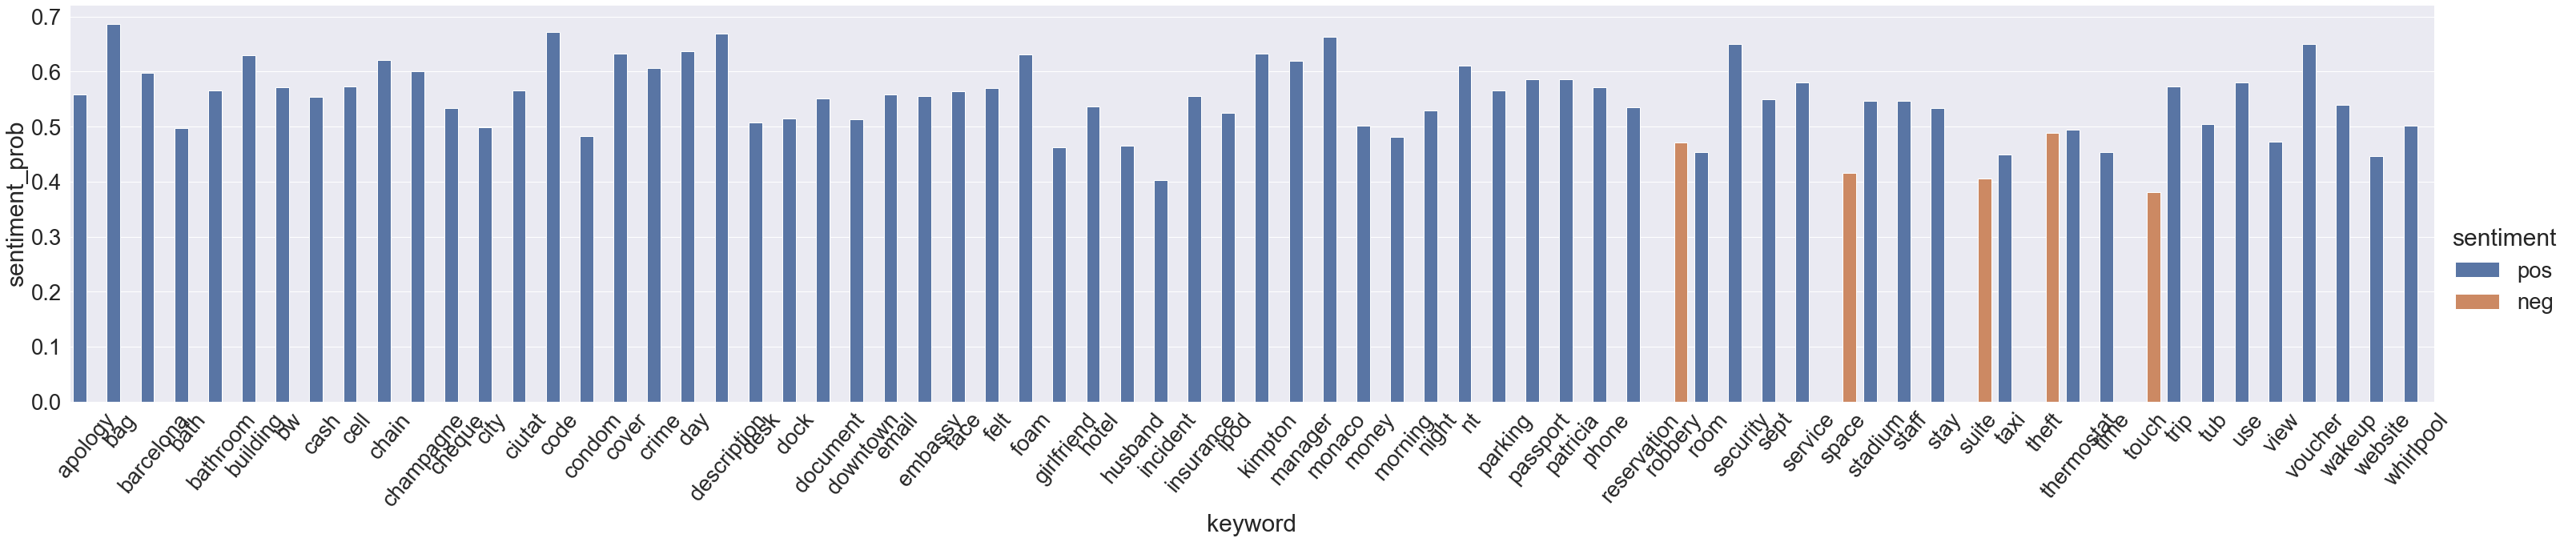

In [35]:
import seaborn as sns
from matplotlib import rcParams
sns.set(font_scale=2.5)
# figure size in inches
rcParams['figure.figsize'] = 600,400
my_np_array=np.array(sorted(plot_list)[:count])
my_np_array=my_np_array.reshape(count,3)
df_plot = pd.DataFrame(my_np_array, columns=['keyword','sentiment','sentiment_prob'])
df_plot=df_plot.astype({'sentiment_prob': 'float'})
plot=sns.catplot(x="keyword", y="sentiment_prob", hue="sentiment",kind="bar", data=df_plot, height=8.27, aspect=11.7/2.27)
plot.set_xticklabels(rotation=50)